In [5]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('/Users/john/Downloads/Vis_Data.csv')

# Display the data with all columns and rows visible
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(data)


,#wl [um],dwl [um],Vis,Vis_err,U [meters],V [meters],U [lambdas],V [lambdas],Cal
0,2.133,0.3489,0.498799,0.020650,175.35,272.90,8.220816e+07,1.279419e+08,HD176303
1,2.133,0.3489,0.655362,0.085459,169.39,274.78,7.941397e+07,1.288233e+08,HD176303
2,2.133,0.3489,0.595735,0.107113,157.89,277.95,7.402250e+07,1.303094e+08,HD176303
3,2.133,0.3489,0.527352,0.031852,148.52,280.20,6.962963e+07,1.313643e+08,HD176303
4,2.133,0.3489,0.577408,0.057163,137.04,282.60,6.424754e+07,1.324895e+08,HD176303
5,2.133,0.3489,0.704982,0.160313,126.27,284.58,5.919831e+07,1.334177e+08,HD176303
6,2.133,0.3489,0.648460,0.109460,106.15,287.64,4.976559e+07,1.348523e+08,HD176303
7,2.133,0.3489,0.557763,0.032127,98.90,288.58,4.636662e+07,1.352930e+08,HD176303
8,2.133,0.3489,0.550636,0.034250,87.33,289.90,4.094233e+07,1.359119e+08,HD176303
9,2.133,0.3489,0.586345,0.062153,68.84,291.61,3.227379e+07,1.367135e+08,HD176303


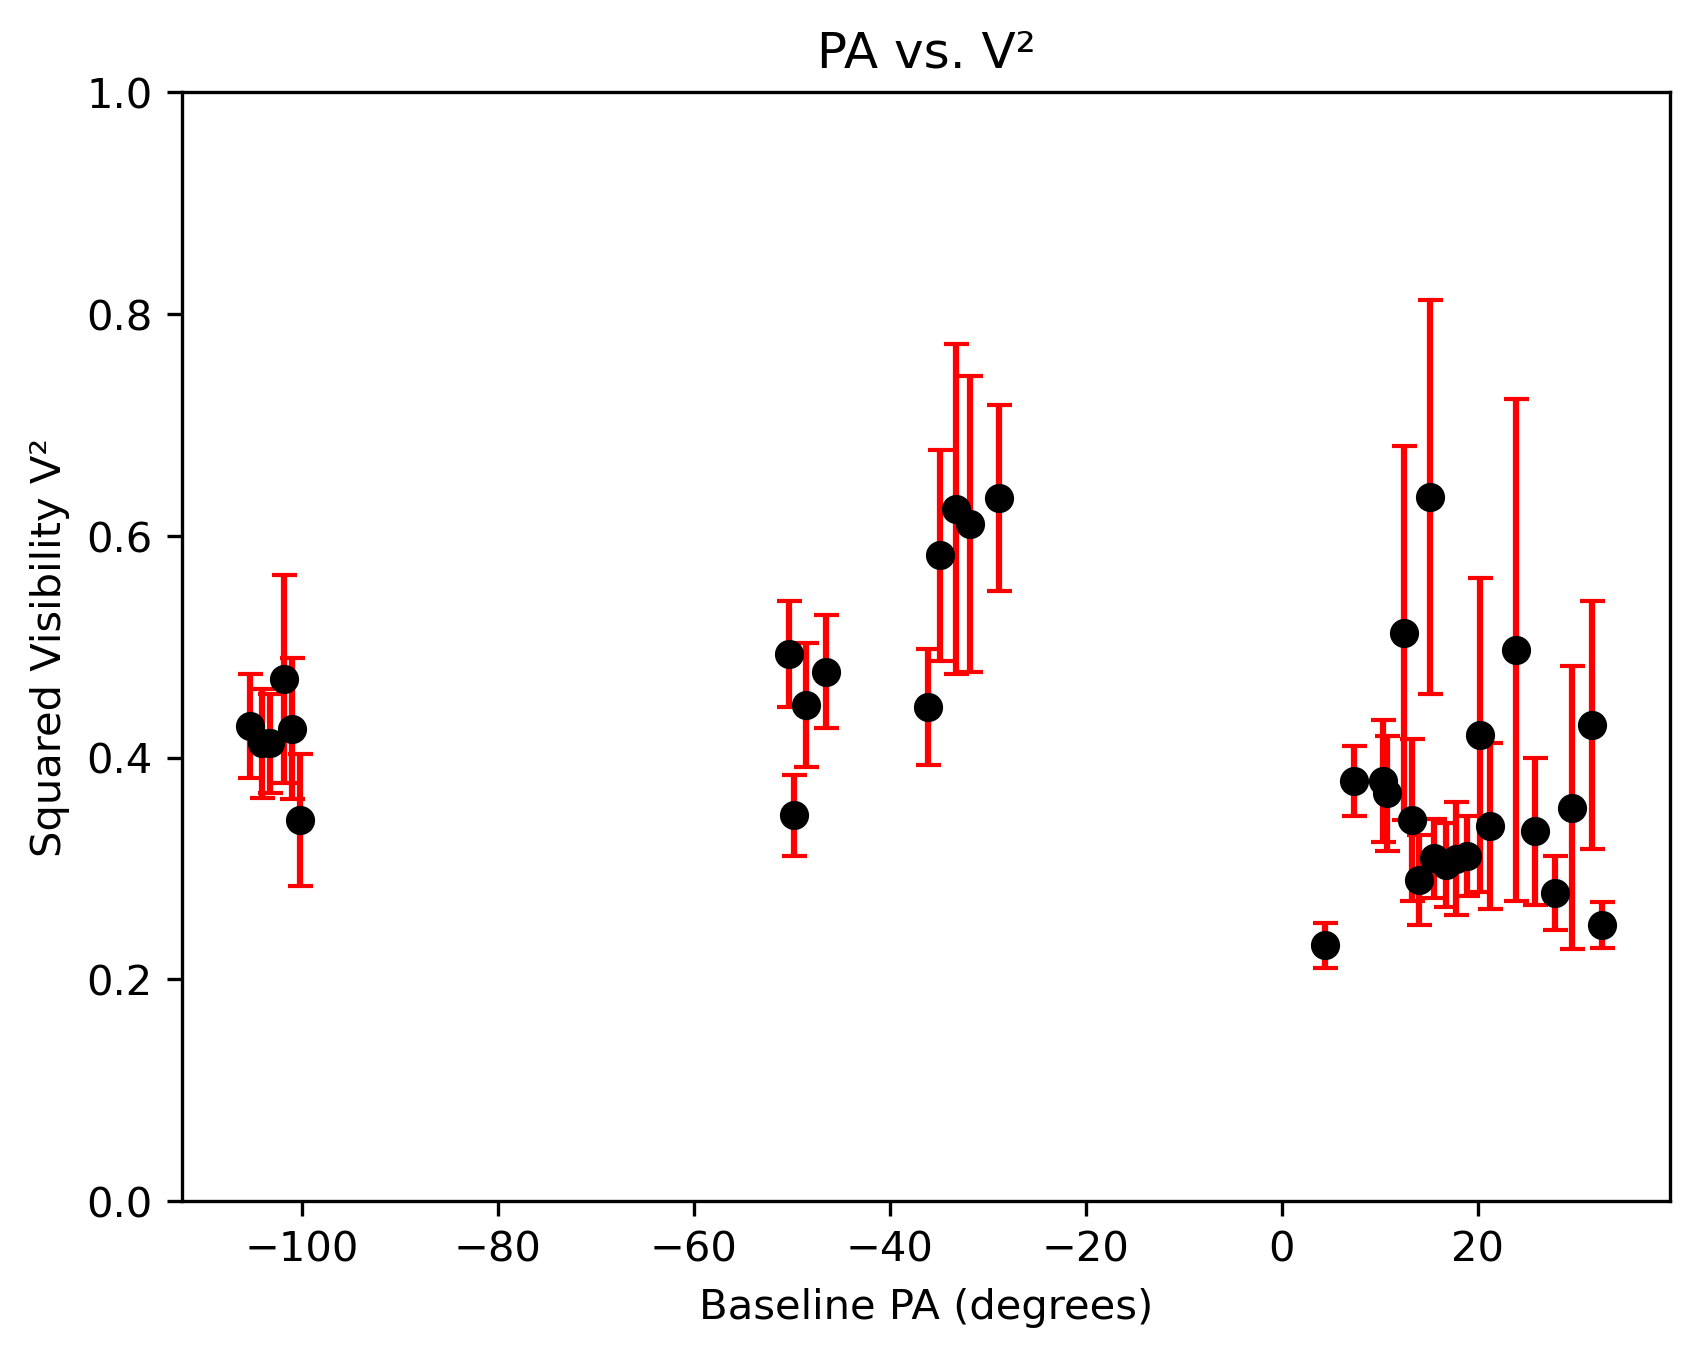

In [160]:
import numpy as np
import matplotlib.pyplot as plt

def read_columns_with_space(file_path):
    columns = {}

    with open(file_path, 'r') as file:
        headers = next(file).strip().split()  # Read the first line (header) and split by space

        for col_index, col_name in enumerate(headers):
            columns[col_name.strip()] = []  # Strip leading/trailing whitespaces from the column names

        for line in file:
            row = line.strip().split()  # Split the line by space
            for col_index, col_value in enumerate(row):
                col_name = headers[col_index].strip()  # Strip leading/trailing whitespaces from the column names
                columns[col_name].append(col_value)

    return columns, headers  # Return both the columns dictionary and the headers list

# Data
file_path = "/Users/john/Downloads/HD177724.vis"
columns_data, headers = read_columns_with_space(file_path)

# Check if the 'U' and 'V' columns are in the dataset
if 'U_lambdas' in columns_data and 'V_lambdas' in columns_data:
    # Convert the 'U' and 'V' column values to floats
    u_values = [float(u_val) for u_val in columns_data['U_lambdas']]
    v_values = [float(v_val) for v_val in columns_data['V_lambdas']]

    # Calculate the PA values using the formula PA = arctan(U / V) in degrees
    pa_values = np.degrees(np.arctan2(u_values, v_values))

    # Convert the 'Vis' and 'Vis_Err' column values to floats and calculate squared visibility and visibility error
    vis_values = [float(vis_val) ** 2 for vis_val in columns_data['Vis']]
    vis_err_values = [2 * float(vis_val) * float(vis_err_val) for vis_val, vis_err_val in zip(columns_data['Vis'], columns_data[headers[3]])]

    # Plot error bars with captions
    plt.rcParams['figure.dpi'] = 300
    plt.errorbar(pa_values, vis_values, yerr=vis_err_values, fmt='o', color='black', ecolor='red', capsize=3)

    plt.ylim(0, 1)
    plt.xlabel('Baseline PA (degrees)')
    plt.ylabel('Squared Visibility V²')
    plt.title('PA vs. V²')
    plt.savefig('baseline_plot_with_error_bars.png')
    plt.show()

else:
    print("Columns 'U_lambdas' and/or 'V_lambdas' are missing in the data.")


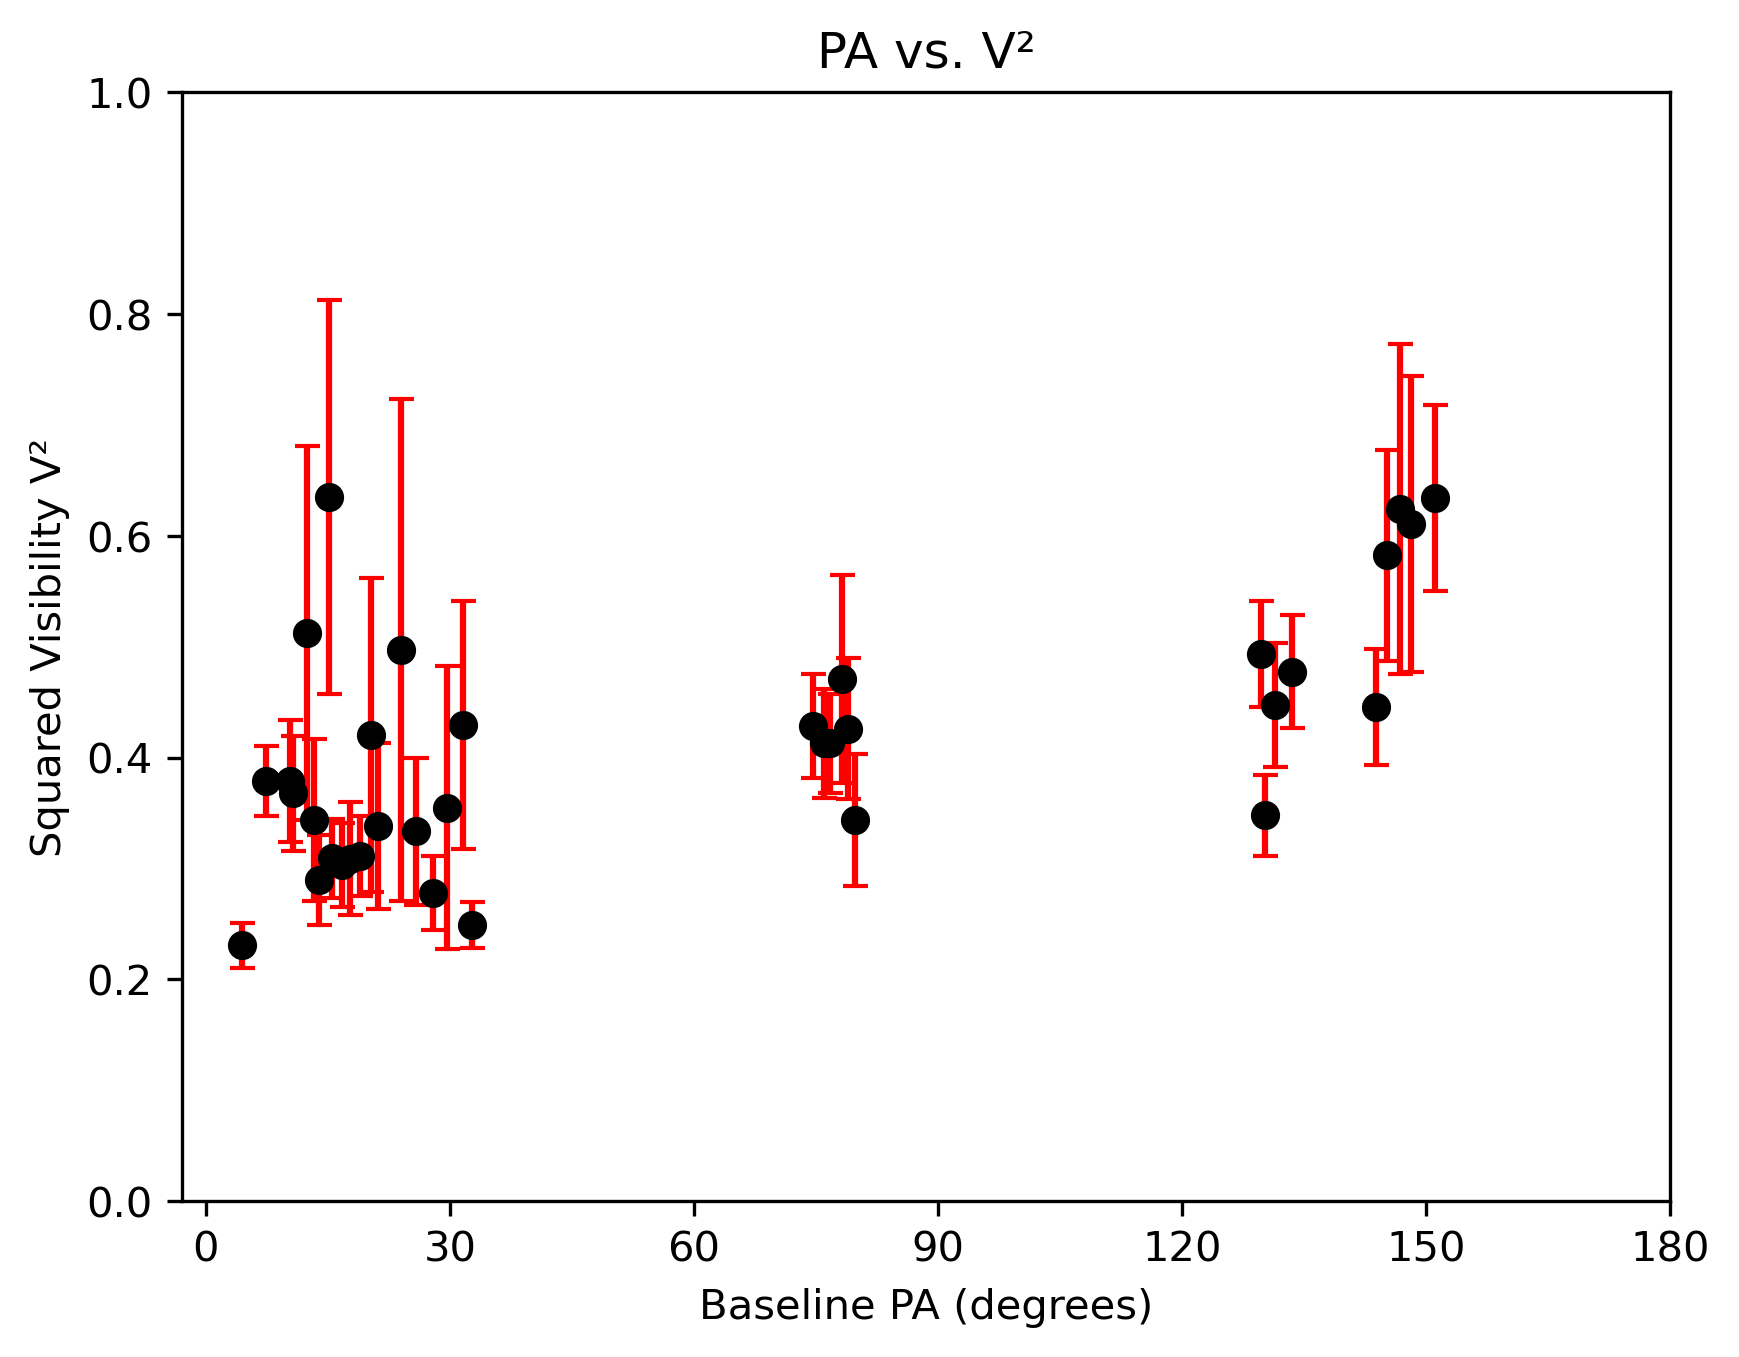

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def read_columns_with_space(file_path):
    columns = {}

    with open(file_path, 'r') as file:
        headers = next(file).strip().split()  # Read the first line (header) and split by space

        for col_index, col_name in enumerate(headers):
            columns[col_name.strip()] = []  # Strip leading/trailing whitespaces from the column names

        for line in file:
            row = line.strip().split()  # Split the line by space
            for col_index, col_value in enumerate(row):
                col_name = headers[col_index].strip()  # Strip leading/trailing whitespaces from the column names
                columns[col_name].append(col_value)

    return columns, headers  # Return both the columns dictionary and the headers list

# Data
file_path = "/Users/john/Downloads/HD177724.vis"
columns_data, headers = read_columns_with_space(file_path)

# Check if the 'U' and 'V' columns are in the dataset
if 'U_lambdas' in columns_data and 'V_lambdas' in columns_data:
    # Convert the 'U' and 'V' column values to floats
    u_values = [float(u_val) for u_val in columns_data['U_lambdas']]
    v_values = [float(v_val) for v_val in columns_data['V_lambdas']]

    # Calculate the PA values using the formula PA = arctan(U / V) in degrees
    pa_values = np.degrees(np.arctan2(u_values, v_values))

    # Move the PA values to the range from 0 to 180 degrees
    pa_values = (pa_values + 180) % 180

    # Convert the 'Vis' and 'Vis_Err' column values to floats and calculate squared visibility and visibility error
    vis_values = [float(vis_val) ** 2 for vis_val in columns_data['Vis']]
    vis_err_values = [2 * float(vis_val) * float(vis_err_val) for vis_val, vis_err_val in zip(columns_data['Vis'], columns_data[headers[3]])]

    # Plot error bars with captions
    plt.rcParams['figure.dpi'] = 300
    plt.errorbar(pa_values, vis_values, yerr=vis_err_values, fmt='o', color='black', ecolor='red', capsize=3)

    plt.ylim(0, 1)
    plt.xlabel('Baseline PA (degrees)')
    plt.ylabel('Squared Visibility V²')
    plt.title('PA vs. V²')

    # Set the x-axis ticks from 0 to 180 degrees with an interval of 30 degrees
    plt.xticks(np.arange(0, 181, 30))

    plt.savefig('baseline_plot_with_error_bars.png')
    plt.show()

else:
    print("Columns 'U_lambdas' and/or 'V_lambdas' are missing in the data.")
